In [1]:
import numpy as np
from scipy.optimize import linprog
from ipynb.fs.full.functions import nn2na, get_selected_arcs
import matplotlib.pyplot as plt

In [2]:
#Import data
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])
beq = np.array([1, 0, 0, 0, 0, -1])
C = np.array([2, 1, 2, 5, 2, 1, 2])
t = np.array([[3, 1, 3, 1, 3, 3, 5]])
T = 8

In [3]:
# DATA transforming for optimization:
Aeq, arc_idxs, arc_idxs_list = nn2na(NN)
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

I define lambda vector with values between 0 and 1: 

In [4]:
lamb = np.arange(0, 1.05, 0.05)

I define the vector where afterwards we'll save (iteration by iteration) Langrange's values:

In [5]:
L = np.zeros(np.shape(lamb))

I iterate for every lambda to find the value that gives the best value of OF:

In [6]:
Lmax = 0
for i in range(len(lamb)):
    lag_c = C + t[0] * lamb[i]
    res = linprog(lag_c, A_eq=Aeq, b_eq=beq, bounds=bounds, method='revised simplex')
    L[i] = res.fun - lamb[i] * T
    print('lambda = ',round(lamb[i],ndigits=4),'Obf Func: ',round(L[i],ndigits=4))
    selarcs = get_selected_arcs(arc_idxs, res.x)
    if L[i]>Lmax:
        selarcs_max = selarcs
    print(selarcs)


C:\Users\joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  after removing the cwd from sys.path.


lambda =  0.0 Obf Func:  5.0
[(0, 2), (2, 4), (4, 5)]
lambda =  0.05 Obf Func:  5.05
[(0, 1), (1, 3), (3, 5)]
lambda =  0.1 Obf Func:  5.1
[(0, 1), (1, 3), (3, 5)]
lambda =  0.15 Obf Func:  5.15
[(0, 2), (2, 4), (4, 5)]
lambda =  0.2 Obf Func:  5.2
[(0, 2), (2, 4), (4, 5)]
lambda =  0.25 Obf Func:  5.25
[(0, 2), (2, 4), (4, 5)]
lambda =  0.3 Obf Func:  5.3
[(0, 2), (2, 4), (4, 5)]
lambda =  0.35 Obf Func:  5.35
[(0, 1), (1, 3), (3, 5)]
lambda =  0.4 Obf Func:  5.4
[(0, 1), (1, 5)]
lambda =  0.45 Obf Func:  5.2
[(0, 1), (1, 5)]
lambda =  0.5 Obf Func:  5.0
[(0, 1), (1, 5)]
lambda =  0.55 Obf Func:  4.8
[(0, 1), (1, 5)]
lambda =  0.6 Obf Func:  4.6
[(0, 1), (1, 5)]
lambda =  0.65 Obf Func:  4.4
[(0, 1), (1, 5)]
lambda =  0.7 Obf Func:  4.2
[(0, 1), (1, 5)]
lambda =  0.75 Obf Func:  4.0
[(0, 1), (1, 5)]
lambda =  0.8 Obf Func:  3.8
[(0, 1), (1, 5)]
lambda =  0.85 Obf Func:  3.6
[(0, 1), (1, 5)]
lambda =  0.9 Obf Func:  3.4
[(0, 1), (1, 5)]
lambda =  0.95 Obf Func:  3.2
[(0, 1), (1, 5)]
la

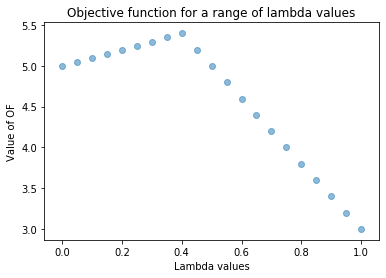

In [7]:
plt.scatter(lamb, L, alpha=0.5)
plt.xlabel('Lambda values')
plt.ylabel('Value of OF')
plt.title('Objective function for a range of lambda values')
plt.show()

In [8]:
opt_time = np.sum(res.x * t)

In [9]:
print('The value of lambda that maximizes the function is: %s \n'
      'And the objective function (modified) takes the value of: %s \n'
      'The arcs that make the shortest path are: %s \n'
      'The shortest path takes %s time units to be covered'%(lamb[np.argmax(L)],max(L),selarcs_max, opt_time))

The value of lambda that maximizes the function is: 0.4 
And the objective function (modified) takes the value of: 5.400000000000001 
The arcs that make the shortest path are: [(0, 1), (1, 5)] 
The shortest path takes 4.0 time units to be covered
